In [133]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import seaborn as sns
cmap1 = sns.color_palette("crest", as_cmap=True)
cmap2 = sns.color_palette("rocket", as_cmap=True)
cmap2 = sns.diverging_palette(220, 20, as_cmap=True)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family ='serif',size=18)
import cycler

import pandas as pd

### Damage Protocol

In [110]:
def loadUnload(time,lammax):
    prot = lambda x: 1+(lammax-1)*x/25 if x<25 else lammax-(lammax-1)*(x-25)/10
    return [prot(t) for t in time]

time = np.linspace(0,35,100)
lammaxlist = [1.4,1.5,1.6,1.7]

prots = [loadUnload(time,lammax) for lammax in lammaxlist]

fullLoadUnload = np.array([np.tile(prots[i],5) for i in range(len(lammaxlist))]).flatten()
fullTime = np.linspace(0,35*4*4,fullLoadUnload.shape[0])


/var/folders/nc/j50yglgj73n8drvvbjqxczw40000gn/T/ipykernel_59578/487108106.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


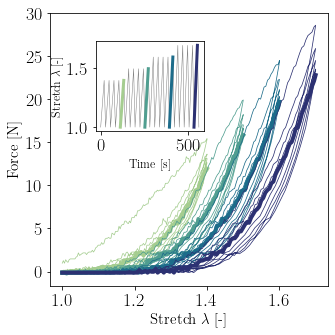

In [111]:
Data = pd.read_csv("PA_Breast_SubQ6Data.csv")
Data.drop(Data.index[Data['Cycle'] == '1-Preload'], inplace=True)

SetNames = ['Stretch4', 'Stretch5', 'Stretch6', 'Stretch7']
CycleName = '5-Stretch'



fig,ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.set_prop_cycle(cycler.cycler('color', cmap1(np.linspace(0,1,4)))) 
cm =  cmap1(np.linspace(0,1,4))

for i,j in enumerate(SetNames):
    a = Data[Data.SetName == j]
    a_Dat = Data.loc[(Data.SetName == j)&(Data.Cycle == CycleName)]
    
    stretch = a.Size_mm.to_numpy()/a.Size_mm.to_numpy()[0]
    Force = a.Force_N
    
    stretch_Dat = a_Dat.Size_mm.to_numpy()/a_Dat.Size_mm.to_numpy()[0]
    Force_Dat = a_Dat.Force_N

    ax1.plot(stretch,Force,lw=0.75,color = cm[i])
    ax1.plot(stretch_Dat,Force_Dat,lw=4.0,color = cm[i])   
ax1.set_xlabel(r"Stretch $\lambda$ [-]", fontsize=15)
ax1.set_ylabel(r"Force [N]", fontsize=15)

left, bottom, width, height = [0.3, 0.6, 0.3, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(fullTime,fullLoadUnload,lw=0.5,color='grey')

for i in range(len(lammaxlist)):
    ax2.plot(fullTime[(500*i+400):(500*i+400)+71],fullLoadUnload[(500*i+400):(500*i+400)+71],color = cm[i],lw=3.0)
ax2.set_xlabel(r"Time [s]", fontsize=12)
ax2.set_ylabel(r"Stretch $\lambda$ [-]", fontsize=12)


plt.tight_layout()
plt.savefig('LoadingProtocol',dpi=300)

### Fracture Protocol 

In [118]:
Data = pd.read_csv("PA_Breast_SubQ6_fracData.csv")
Data.drop(Data.index[Data['Cycle'] == '1-Preload'], inplace=True)

a = Data[Data.SetName == 'Stretch']
stretch = a.Size_mm.to_numpy()/a.Size_mm.to_numpy()[0]
Force = a.Force_N
time = Data.Time_S.to_numpy()



/var/folders/nc/j50yglgj73n8drvvbjqxczw40000gn/T/ipykernel_59578/1300564980.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


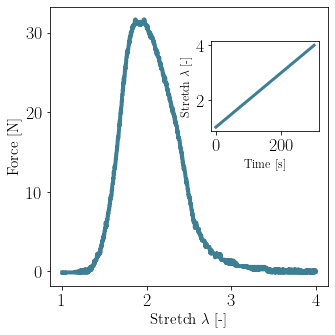

In [140]:
fig,ax1 = plt.subplots(1,1,figsize=(5,5))

ax1.set_prop_cycle(cycler.cycler('color', cmap2(np.linspace(0,1,4)))) 
cm =  cmap2(np.linspace(0,1,4))

ax1.plot(stretch,Force,lw=4.0,color=cm[0])
ax1.set_xlabel(r"Stretch $\lambda$ [-]", fontsize=15)
ax1.set_ylabel(r"Force [N]", fontsize=15)

left, bottom, width, height = [0.62, 0.6, 0.3, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(time,stretch,lw=3.0,color=cm[0])
ax2.set_xlabel(r"Time [s]", fontsize=12)
ax2.set_ylabel(r"Stretch $\lambda$ [-]", fontsize=12)

plt.tight_layout()
plt.savefig('FractureProtocol',dpi=300)